In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [ ]:
data = pd.read_csv("/content/DataSampled.csv")

In [ ]:
data.head()
#full dataset

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking (packet/year),Alcohol,DM,...,Exercise,LowCST,CST,Gait speed,Low grip strength,Grip strength,SARCOPENIA,STAR,BMI,Gender
0,NaN,64,66.0,155.0,89.0,104.0,0.0,0,0,0,...,0,0.0,8.1,1.28,0.0,28,0.0,1.00,27.40,F
1,NaN,53,55.0,150.0,77.0,97.0,0.0,0,0,0,...,NaN,0.0,8.0,1.47,1.0,16,0.0,1.84,24.40,F
2,24.0,56,56.0,150.0,112.0,125.0,0.0,0,0,0,...,0,0.0,11.7,0.80,0.0,23,0.0,1.48,36.00,F
3,NaN,58,75.0,160.0,113.0,NaN,0.0,0,0,1,...,0,1.0,18.0,1.34,0.0,23,0.0,1.12,29.30,F
4,30.0,55,72.0,157.0,98.0,104.0,1.0,4,0,0,...,1-2/week,NaN,10.9,1.09,NaN,21,0.0,1.45,29.21,F


In [ ]:
data.shape
#shape of dataset

(1303, 39)

In [ ]:
data.info()
#tells us about how many non-null values and data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MMSE                    812 non-null    float64
 1   Age                     1303 non-null   int64  
 2   Weight                  1302 non-null   float64
 3   Height                  1301 non-null   float64
 4   Waist                   1297 non-null   float64
 5   Hip                     1296 non-null   float64
 6   Smoking                 1302 non-null   float64
 7    Smoking (packet/year)  1301 non-null   object 
 8     Alcohol               1303 non-null   object 
 9   DM                      1303 non-null   int64  
 10  DM duration             1289 non-null   float64
 11  İnsülin                 1297 non-null   float64
 12   DM drug                379 non-null    object 
 13  Hiperlipidemi           1301 non-null   float64
 14  Dyslipidemia duration   1287 non-null   

In [ ]:
print(data.columns)
#displays all columns

Index(['MMSE', 'Age', 'Weight ', 'Height ', 'Waist ', 'Hip', 'Smoking',
       ' Smoking (packet/year)', '  Alcohol', 'DM ', 'DM duration', 'İnsülin',
       ' DM drug', 'Hiperlipidemi', 'Dyslipidemia duration',
       'Dyslipidemia drugs ', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM',
       'KOAH', 'OP', 'Other(s)', 'HT', 'Anti-HT drug type', 'HT duration',
       'Education', 'Occupation', 'Working Status', 'Exercise', 'LowCST',
       'CST', 'Gait speed', 'Low grip strength', 'Grip strength', 'SARCOPENIA',
       'STAR', 'BMI', 'Gender'],
      dtype='object')


In [ ]:
def replace_nan_with_nan(data):
    return data.replace('NaN', np.nan)
# Define a function to replace 'NaN' strings with actual NaN values

In [ ]:
data['Exercise'].unique()
#Finding unique values, so that we know

array(['0', nan, '1-2/week', '3-4/week'], dtype=object)

In [ ]:
def map_exercise_to_numeric(data):
    mapping = {
        '0': 0,
        '1-2/week': 1.5,
        '3-4/week': 3.5
    }
    data['Exercise'] = data['Exercise'].map(mapping).fillna(0)
    return data

#Maps the strings in exercise column to ints, representing weeks
#NaN values are filled with 0s

In [ ]:
data = map_exercise_to_numeric(data)

In [ ]:
num_nan_target_values = data['SARCOPENIA'].isna().sum()
print(num_nan_target_values)
#Finding out how many NaN values in the target variable

1


In [ ]:
data = data.dropna(subset = ['SARCOPENIA'])
#Drops NaN values (it should only drop 1 NaN value based on the last cell)

In [ ]:
#Model 1: Logistic Regression
X1 = data[['Age', 'Weight ', 'Height ', 'Exercise', 'HT', 'DM ', 'Education', 'Smoking']]
y1 = data['SARCOPENIA']

#Splits dataset with only columns that are needed for Model 1

In [ ]:
columns1 = ['Age', 'Weight ', 'Height ', 'Exercise', 'HT', 'DM ', 'Education', 'Smoking']
df1 = pd.DataFrame(X1, columns = columns1)

#Creating a dataframe with just the needed columns for Model 1
#Mainly for display purposes so we can see what data we need to work with

In [ ]:
df1.head(20)

,Age,Weight,Height,Exercise,HT,DM,Education,Smoking
0,64,66.0,155.00,0.0,0,0,High School,0.0
1,53,55.0,150.00,0.0,0,0,NaN,0.0
2,56,56.0,150.00,0.0,1,0,Illiterate,0.0
3,58,75.0,160.00,0.0,1,1,illiterate,0.0
4,55,72.0,157.00,1.5,0,0,ilkokul,1.0
5,57,98.0,179.00,1.5,1,0,High School,1.0
6,60,65.0,164.00,0.0,0,0,Secondary School,1.0
7,75,74.0,170.00,1.5,1,0,illiterate,0.0
8,60,80.0,150.00,0.0,1,0,Illiterate,0.0
9,76,70.0,168.00,3.5,1,1,University,0.0


In [ ]:
X1.shape
#Shape of X data

(1302, 8)

In [ ]:
y1.shape
#Shape of y Data

(1302,)

In [ ]:
df1.isnull()
#Finding out if there are null values
#True means there is null values, False means there isn't
#Note: It's only displaying top and bottom 5 rows
#There's likely many other nulls we aren't seeing

,Age,Weight,Height,Exercise,HT,DM,Education,Smoking
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,False


In [ ]:
X1.dtypes

#Shows X datatypes

Age            int64
Weight       float64
Height       float64
Exercise     float64
HT             int64
DM             int64
Education     object
Smoking      float64
dtype: object

In [ ]:
categorical_features1 = ['Education']
#Creates list of categorical features
boolean_features1 = ['HT', 'DM ', 'Smoking']
#Creates list of boolean features
numeric_features1 = ['Age', 'Weight ', 'Height ', 'Exercise']
#Creates list of numeric features

In [ ]:
numeric_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
#Creates a pipeline with an imputer and scaler
#The imputer handles missing values by filling them in with the mean value of the respective columns


In [ ]:
numeric_transformer1

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [ ]:
boolean_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])
#fills in missing values based on the most frequent value in the column

In [ ]:
boolean_transformer1

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

In [ ]:
categorical_transformer1 = Pipeline(steps=[
     ('nan_replacer', FunctionTransformer(replace_nan_with_nan)),
     ('imputer', SimpleImputer(strategy='constant', fill_value='missing', missing_values=np.nan)),
     ('ohe', OneHotEncoder(handle_unknown='ignore'))]
)
#FunctionTransformer lets us apply the function to replace any NaN strings with NaN values
#SimpleImputer imputes any remaining NaN values by replacing them with the constant value 'missing'
#OneHotEncder encodes categorical variables into a one-hot numeric array, implemented 'ignore' to ignore unknown categories

In [ ]:
categorical_transformer1

Pipeline(steps=[('nan_replacer',
                 FunctionTransformer(func=<function replace_nan_with_nan at 0x7ca73b7a35b0>)),
                ('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer1, numeric_features1),
        ('bool', boolean_transformer1, boolean_features1),
        ('cat', categorical_transformer1, categorical_features1)
    ])
#ColumnTransformer allows different preprocessing steps for different subsets of columns
#transformers is a list of tuples with three elements:
#The name, the transformer, and the columns

In [ ]:
preprocessor1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Weight ', 'Height ', 'Exercise']),
                                ('bool',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['HT', 'DM ', 'Smoking']),
                                ('cat',
                                 Pipeline(steps=[('nan_replacer',
                                                  FunctionTransformer(func=<function replace_nan_with_nan at 0x7ca73b7a35b0>)),
                                                 ('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Education'])])

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state = 50) #random value for random_state

In [ ]:
full_pipeline1 = Pipeline([
    ('preprocessor', preprocessor1),
    ('regressor', LogisticRegression(max_iter=10000))
])
#the preprocessor is the one we previously created
#the regressor is the logistic regresssion model

In [ ]:
full_pipeline1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Weight ', 'Height ',
                                                   'Exercise']),
                                                 ('bool',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['HT', 'DM ', 'Smoking']),
                                                 ('cat',
                                                  Pipeline(steps=[('nan_replacer',
                                                                   FunctionTransformer(func=<function replace_nan_with_nan at 0x7ca73b7a35b0>)),
                                                                  ('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Education'])])),
                ('regressor', LogisticRegression(max_iter=10000))])

In [ ]:
full_pipeline1.fit(X_train1, y_train1)
#Pipeline successfully fit onto our data

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Weight ', 'Height ',
                                                   'Exercise']),
                                                 ('bool',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['HT', 'DM ', 'Smoking']),
                                                 ('cat',
                                                  Pipeline(steps=[('nan_replacer',
                                                                   FunctionTransformer(func=<function replace_nan_with_nan at 0x7ca73b7a35b0>)),
                                                                  ('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Education'])])),
                ('regressor', LogisticRegression(max_iter=10000))])

In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1302 non-null   int64  
 1   Weight     1302 non-null   float64
 2   Height     1301 non-null   float64
 3   Exercise   1302 non-null   float64
 4   HT         1302 non-null   int64  
 5   DM         1302 non-null   int64  
 6   Education  1282 non-null   object 
 7   Smoking    1301 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 91.5+ KB


In [ ]:
y_pred1 = full_pipeline1.predict(X_test1)
print(y_pred1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
accuracy1 = accuracy_score(y_test1, y_pred1)
print(f'Model 1 Accuracy: {accuracy1}')

Model 1 Accuracy: 0.8159509202453987


In [ ]:
conf_matrix1 = confusion_matrix(y_test1, y_pred1)
print('Model 1 Confusion Matrix:')
print(conf_matrix1)

Model 1 Confusion Matrix:
[[256  12]
 [ 48  10]]


In [ ]:
precision1 = precision_score(y_test1, y_pred1)
recall1 = recall_score(y_test1, y_pred1)
f1_1 = f1_score(y_test1, y_pred1)

print(f'Model 1 Precision: {precision1}')
print(f'Model 1 Recall: {recall1}')
print(f'Model 1 F1 Score: {f1_1}')

Model 1 Precision: 0.45454545454545453
Model 1 Recall: 0.1724137931034483
Model 1 F1 Score: 0.25000000000000006


In [ ]:
class_report1 = classification_report(y_test1, y_pred1)
print('Model 1 Classification Report:')
print(class_report1)

Model 1 Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90       268
         1.0       0.45      0.17      0.25        58

    accuracy                           0.82       326
   macro avg       0.65      0.56      0.57       326
weighted avg       0.77      0.82      0.78       326



In [ ]:
y_pred_proba1 = full_pipeline1.predict_proba(X_test1)[:, 1]
roc_auc1 = roc_auc_score(y_test1, y_pred_proba1)
print(f'ROC AUC Score: {roc_auc1}')

ROC AUC Score: 0.7375193000514668


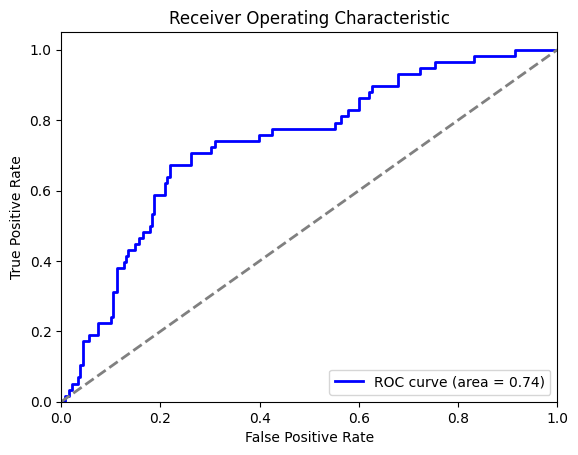

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba1)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
coefficients1 = full_pipeline1.named_steps['regressor'].coef_[0]
#Extract coefficients from the logistic regression model
numeric_boolean_features1 = numeric_features1 + boolean_features1
#extract numeric and boolean feature names
onehot_features1 = full_pipeline1.named_steps['preprocessor'].transformers_[2][1].named_steps['ohe'].get_feature_names_out(categorical_features1)
#Extract the feature names from the preprocessor
features1 = numeric_boolean_features1 + list(onehot_features1)
#Combine all feature names

print(f'Number of coefficients: {len(coefficients1)}')
print(f'Number of features: {len(features1)}')
#Verify lengths match

Number of coefficients: 36
Number of features: 36


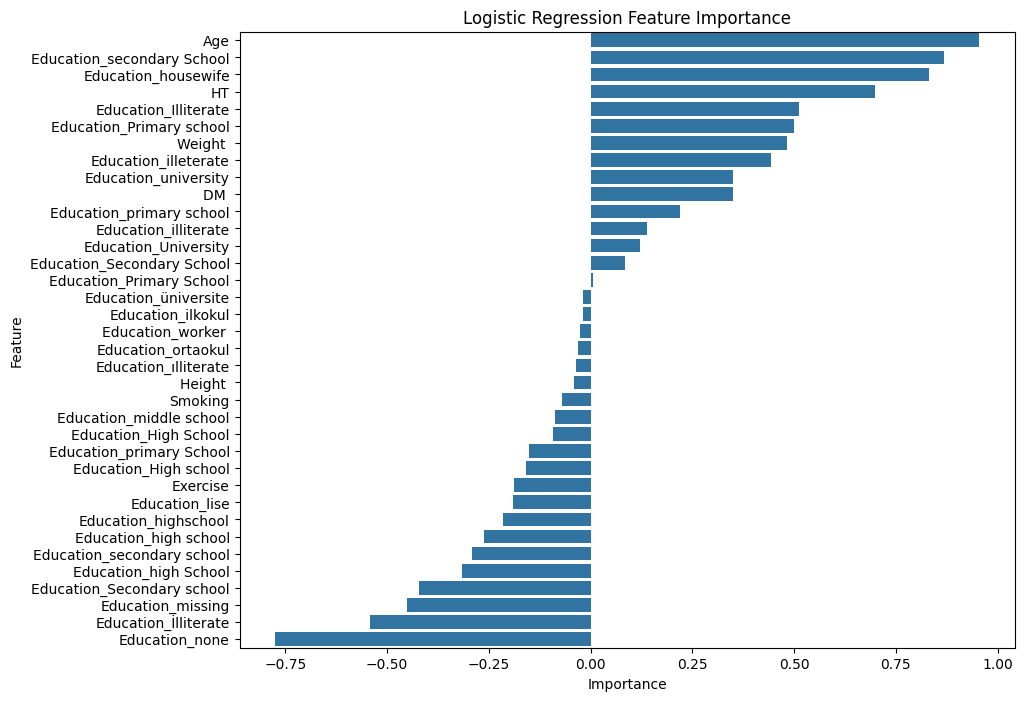

In [ ]:
# Create the feature importance dataframe
feature_importance_df1 = pd.DataFrame({'Feature': features1, 'Importance': coefficients1})
feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df1)
plt.title('Logistic Regression Feature Importance')
plt.show()

In [ ]:
#Model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X2 = data[['Age', 'Weight ', 'Height ', 'Exercise', 'HT', 'DM ', 'Education', 'Smoking', 'CST', 'Gait speed']]
y2 = data['SARCOPENIA']

In [ ]:
columns2 = ['Age', 'Weight ', 'Height ', 'Exercise', 'HT', 'DM ', 'Education', 'Smoking', 'CST', 'Gait speed']
df2 = pd.DataFrame(X2, columns = columns2)

In [ ]:
df2.head(20)

,Age,Weight,Height,Exercise,HT,DM,Education,Smoking,CST,Gait speed
0,64,66.0,155.00,0.0,0,0,High School,0.0,8.1,1.28
1,53,55.0,150.00,0.0,0,0,NaN,0.0,8.0,1.47
2,56,56.0,150.00,0.0,1,0,Illiterate,0.0,11.7,0.80
3,58,75.0,160.00,0.0,1,1,illiterate,0.0,18.0,1.34
4,55,72.0,157.00,1.5,0,0,ilkokul,1.0,10.9,1.09
5,57,98.0,179.00,1.5,1,0,High School,1.0,8.0,0.83
6,60,65.0,164.00,0.0,0,0,Secondary School,1.0,9.2,1.13
7,75,74.0,170.00,1.5,1,0,illiterate,0.0,10.1,1.36
8,60,80.0,150.00,0.0,1,0,Illiterate,0.0,26.3,2.06
9,76,70.0,168.00,3.5,1,1,University,0.0,10.0,1.20


In [ ]:
X2.shape

(1302, 10)

In [ ]:
y2.shape

(1302,)

In [ ]:
df2.isnull()

,Age,Weight,Height,Exercise,HT,DM,Education,Smoking,CST,Gait speed
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,False,False,False


In [ ]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1302 non-null   int64  
 1   Weight      1302 non-null   float64
 2   Height      1301 non-null   float64
 3   Exercise    1302 non-null   float64
 4   HT          1302 non-null   int64  
 5   DM          1302 non-null   int64  
 6   Education   1282 non-null   object 
 7   Smoking     1301 non-null   float64
 8   CST         1302 non-null   float64
 9   Gait speed  1299 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 111.9+ KB


In [ ]:
categorical_features2 = ['Education']

boolean_features2 = ['HT', 'DM ', 'Smoking']

numeric_features2 = ['Age', 'Weight ', 'Height ', 'Exercise', 'CST', 'Gait speed']

In [ ]:
numeric_transformer2 = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='mean')),
    ('scaler2', StandardScaler()),
])

In [ ]:
numeric_transformer2

Pipeline(steps=[('imputer2', SimpleImputer()), ('scaler2', StandardScaler())])

In [ ]:
boolean_transformer2 = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='most_frequent'))
])

In [ ]:
boolean_transformer2

Pipeline(steps=[('imputer2', SimpleImputer(strategy='most_frequent'))])

In [ ]:
categorical_transformer2 = Pipeline(steps=[
     ('nan_replacer2', FunctionTransformer(replace_nan_with_nan)),
     ('imputer2', SimpleImputer(strategy='constant', fill_value='missing', missing_values=np.nan)),
     ('ohe2', OneHotEncoder(handle_unknown='ignore'))]
)

In [ ]:
categorical_transformer2

Pipeline(steps=[('nan_replacer2',
                 FunctionTransformer(func=<function replace_nan_with_nan at 0x7ca73b7a35b0>)),
                ('imputer2',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('ohe2', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num2', numeric_transformer2, numeric_features2),
        ('bool2', boolean_transformer2, boolean_features2),
        ('cat2', categorical_transformer2, categorical_features2)
    ])

In [ ]:
preprocessor2

ColumnTransformer(transformers=[('num2',
                                 Pipeline(steps=[('imputer2', SimpleImputer()),
                                                 ('scaler2',
                                                  StandardScaler())]),
                                 ['Age', 'Weight ', 'Height ', 'Exercise',
                                  'CST', 'Gait speed']),
                                ('bool2',
                                 Pipeline(steps=[('imputer2',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['HT', 'DM ', 'Smoking']),
                                ('cat2',
                                 Pipeline(steps=[('nan_replacer2',
                                                  FunctionTransformer(func=<function replace_nan_with_nan at 0x7ca73b7a35b0>)),
                                                 ('imputer2',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ohe2',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Education'])])

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state = 50)

In [ ]:
full_pipeline2 = Pipeline([
    ('preprocessor2', preprocessor2),
    ('rf_classifier', RandomForestClassifier(n_estimators=100, random_state = 50))
])

In [ ]:
full_pipeline2.fit(X_train2, y_train2)

Pipeline(steps=[('preprocessor2',
                 ColumnTransformer(transformers=[('num2',
                                                  Pipeline(steps=[('imputer2',
                                                                   SimpleImputer()),
                                                                  ('scaler2',
                                                                   StandardScaler())]),
                                                  ['Age', 'Weight ', 'Height ',
                                                   'Exercise', 'CST',
                                                   'Gait speed']),
                                                 ('bool2',
                                                  Pipeline(steps=[('imputer2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['HT', 'DM ', 'Smoking']),
                                                 ('cat2',
                                                  Pipeline(steps=[('nan_replacer2',
                                                                   FunctionTransformer(func=<function replace_nan_with_nan at 0x7ca73b7a35b0>)),
                                                                  ('imputer2',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ohe2',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Education'])])),
                ('rf_classifier', RandomForestClassifier(random_state=50))])

In [ ]:
y_pred2 = full_pipeline2.predict(X_test2)
print(y_pred2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]


In [ ]:
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f'Model 2 Accuracy: {accuracy2}')

Model 2 Accuracy: 0.8558282208588958


In [ ]:
conf_matrix2 = confusion_matrix(y_test2, y_pred2)
print('Model 2 Confusion Matrix:')
print(conf_matrix2)

Model 2 Confusion Matrix:
[[258  10]
 [ 37  21]]


In [ ]:
precision2 = precision_score(y_test2, y_pred2)
recall2 = recall_score(y_test2, y_pred2)
f1_2 = f1_score(y_test2, y_pred2)

print(f'Model 2 Precision: {precision2}')
print(f'Model 2 Recall: {recall2}')
print(f'Model 2 F1 Score: {f1_2}')

Model 2 Precision: 0.6774193548387096
Model 2 Recall: 0.3620689655172414
Model 2 F1 Score: 0.47191011235955055


In [ ]:
class_report2 = classification_report(y_test2, y_pred2)
print('Model 2 Classification Report:')
print(class_report2)

Model 2 Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92       268
         1.0       0.68      0.36      0.47        58

    accuracy                           0.86       326
   macro avg       0.78      0.66      0.69       326
weighted avg       0.84      0.86      0.84       326



In [ ]:
y_pred_proba2 = full_pipeline2.predict_proba(X_test2)[:, 1]
roc_auc2 = roc_auc_score(y_test2, y_pred_proba2)
print(f'ROC AUC Score: {roc_auc2}')

ROC AUC Score: 0.8594312918167782


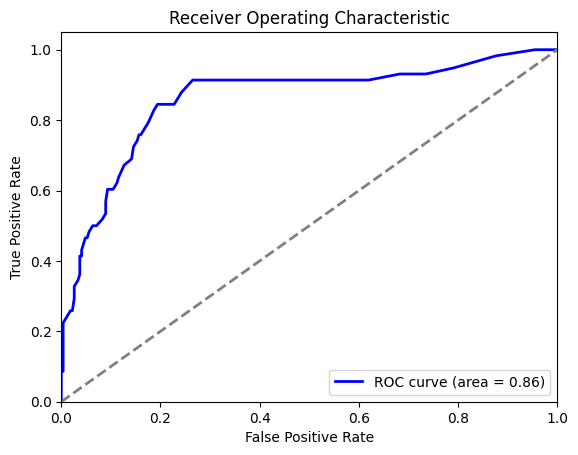

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test2, y_pred_proba2)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
feature_importances2 = full_pipeline2.named_steps['rf_classifier'].feature_importances_
numeric_boolean_features2 = numeric_features2 + boolean_features2
onehot_features2 = full_pipeline2.named_steps['preprocessor2'].transformers_[2][1].named_steps['ohe2'].get_feature_names_out(categorical_features2)
features2 = numeric_boolean_features2 + list(onehot_features2)

print(f'Number of feature importances: {len(feature_importances2)}')
print(f'Number of features: {len(features2)}')

Number of feature importances: 38
Number of features: 38


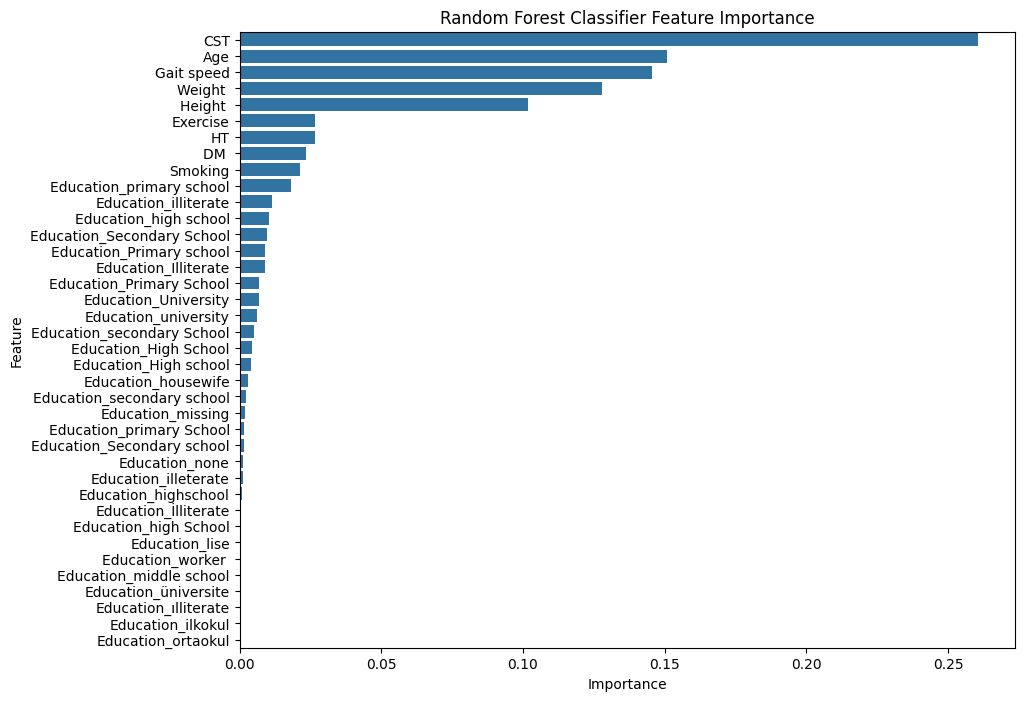

In [ ]:
feature_importance_df2 = pd.DataFrame({'Feature': features2, 'Importance': feature_importances2})
feature_importance_df2 = feature_importance_df2.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df2)
plt.title('Random Forest Classifier Feature Importance')
plt.show()

In [ ]:
#Model 3: XGBoost
X3 = data[['Age', 'Weight ', 'Height ', 'Exercise', 'HT', 'DM ', 'Education', 'Smoking', 'CST', 'Gait speed', 'Grip strength']]
y3 = data['SARCOPENIA']

In [ ]:
columns3 = ['Age', 'Weight ', 'Height ', 'Exercise', 'HT', 'DM ', 'Education', 'Smoking', 'Grip strength']
df3 = pd.DataFrame(X3, columns = columns3)

In [ ]:
df3.head(20)

,Age,Weight,Height,Exercise,HT,DM,Education,Smoking,Grip strength
0,64,66.0,155.00,0.0,0,0,High School,0.0,28
1,53,55.0,150.00,0.0,0,0,NaN,0.0,16
2,56,56.0,150.00,0.0,1,0,Illiterate,0.0,23
3,58,75.0,160.00,0.0,1,1,illiterate,0.0,23
4,55,72.0,157.00,1.5,0,0,ilkokul,1.0,21
5,57,98.0,179.00,1.5,1,0,High School,1.0,42
6,60,65.0,164.00,0.0,0,0,Secondary School,1.0,22
7,75,74.0,170.00,1.5,1,0,illiterate,0.0,22
8,60,80.0,150.00,0.0,1,0,Illiterate,0.0,19
9,76,70.0,168.00,3.5,1,1,University,0.0,25


In [ ]:
X3.shape

(1302, 11)

In [ ]:
y3.shape

(1302,)

In [ ]:
df3.isnull()

,Age,Weight,Height,Exercise,HT,DM,Education,Smoking,Grip strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,False,False


In [ ]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1302 non-null   int64  
 1   Weight         1302 non-null   float64
 2   Height         1301 non-null   float64
 3   Exercise       1302 non-null   float64
 4   HT             1302 non-null   int64  
 5   DM             1302 non-null   int64  
 6   Education      1282 non-null   object 
 7   Smoking        1301 non-null   float64
 8   CST            1302 non-null   float64
 9   Gait speed     1299 non-null   float64
 10  Grip strength  1302 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 122.1+ KB


In [ ]:
categorical_features3 = ['Education']

boolean_features3 = ['HT', 'DM ', 'Smoking']

numeric_features3 = ['Age', 'Weight ', 'Height ', 'Exercise', 'CST', 'Gait speed', 'Grip strength']

In [ ]:
numeric_transformer3 = Pipeline(steps=[
    ('imputer3', SimpleImputer(strategy='mean')),
    ('scaler3', StandardScaler()),
])

In [ ]:
numeric_transformer3

Pipeline(steps=[('imputer3', SimpleImputer()), ('scaler3', StandardScaler())])

In [ ]:
boolean_transformer3 = Pipeline(steps=[
    ('imputer3', SimpleImputer(strategy='most_frequent'))
])

In [ ]:
boolean_transformer3

Pipeline(steps=[('imputer3', SimpleImputer(strategy='most_frequent'))])

In [ ]:
categorical_transformer3 = Pipeline(steps=[
     ('nan_replacer3', FunctionTransformer(replace_nan_with_nan)),
     ('imputer3', SimpleImputer(strategy='constant', fill_value='missing', missing_values=np.nan)),
     ('ohe3', OneHotEncoder(handle_unknown='ignore'))]
)

In [ ]:
preprocessor3 = ColumnTransformer(
    transformers=[
        ('num3', numeric_transformer3, numeric_features3),
        ('bool3', boolean_transformer3, boolean_features3),
        ('cat3', categorical_transformer3, categorical_features3)
    ])

In [ ]:
preprocessor3

ColumnTransformer(transformers=[('num3',
                                 Pipeline(steps=[('imputer3', SimpleImputer()),
                                                 ('scaler3',
                                                  StandardScaler())]),
                                 ['Age', 'Weight ', 'Height ', 'Exercise',
                                  'CST', 'Gait speed', 'Grip strength']),
                                ('bool3',
                                 Pipeline(steps=[('imputer3',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['HT', 'DM ', 'Smoking']),
                                ('cat3',
                                 Pipeline(steps=[('nan_replacer3',
                                                  FunctionTransformer(func=<function replace_nan_with_nan at 0x7ca73b7a35b0>)),
                                                 ('imputer3',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ohe3',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Education'])])

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state = 50)

In [ ]:
full_pipeline3 = Pipeline([
    ('preprocessor3', preprocessor3),
    ('classifier2', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

In [ ]:
full_pipeline3.fit(X_train3, y_train3)

Pipeline(steps=[('preprocessor3',
                 ColumnTransformer(transformers=[('num3',
                                                  Pipeline(steps=[('imputer3',
                                                                   SimpleImputer()),
                                                                  ('scaler3',
                                                                   StandardScaler())]),
                                                  ['Age', 'Weight ', 'Height ',
                                                   'Exercise', 'CST',
                                                   'Gait speed',
                                                   'Grip strength']),
                                                 ('bool3',
                                                  Pipeline(steps=[('imputer3',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['HT', 'DM ', 'Smoking']),
                                                 ('cat3',
                                                  Pipeline(steps=[('n...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
y_pred3 = full_pipeline3.predict(X_test3)
print(y_pred3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0]


In [ ]:
accuracy3 = accuracy_score(y_test3, y_pred3)
print(f'Model 3 Accuracy: {accuracy3}')

Model 3 Accuracy: 0.8588957055214724


In [ ]:
conf_matrix3 = confusion_matrix(y_test3, y_pred3)
print('Model 3 Confusion Matrix:')
print(conf_matrix3)

Model 3 Confusion Matrix:
[[254  14]
 [ 32  26]]


In [ ]:
precision3 = precision_score(y_test3, y_pred3)
recall3 = recall_score(y_test3, y_pred3)
f1_3 = f1_score(y_test3, y_pred3)

print(f'Model 3 Precision: {precision3}')
print(f'Model 3 Recall: {recall3}')
print(f'Model 3 F1 Score: {f1_3}')

Model 3 Precision: 0.65
Model 3 Recall: 0.4482758620689655
Model 3 F1 Score: 0.5306122448979592


In [ ]:
class_report3 = classification_report(y_test3, y_pred3)
print('Model 3 Classification Report:')
print(class_report3)

Model 3 Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       268
         1.0       0.65      0.45      0.53        58

    accuracy                           0.86       326
   macro avg       0.77      0.70      0.72       326
weighted avg       0.85      0.86      0.85       326



In [ ]:
y_pred_proba3 = full_pipeline3.predict_proba(X_test3)[:, 1]
roc_auc3 = roc_auc_score(y_test3, y_pred_proba3)
print(f'ROC AUC Score: {roc_auc3}')

ROC AUC Score: 0.8923057128152343


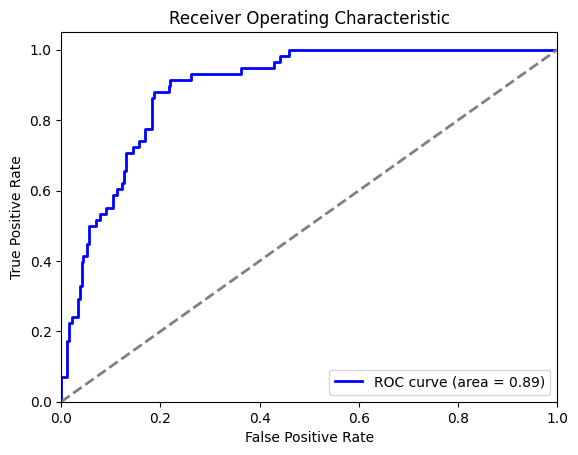

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test3, y_pred_proba3)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
feature_importances3 = full_pipeline3.named_steps['classifier2'].feature_importances_
numeric_boolean_features3 = numeric_features3 + boolean_features3
onehot_features3 = full_pipeline3.named_steps['preprocessor3'].transformers_[2][1].named_steps['ohe3'].get_feature_names_out(categorical_features3)
features3 = numeric_boolean_features3 + list(onehot_features3)

print(f'Number of feature importances: {len(feature_importances3)}')
print(f'Number of features: {len(features3)}')

Number of feature importances: 39
Number of features: 39


In [ ]:
feature_importance_df3 = pd.DataFrame({'Feature': features3, 'Importance': feature_importances3})
feature_importance_df3 = feature_importance_df3.sort_values(by='Importance', ascending=False)

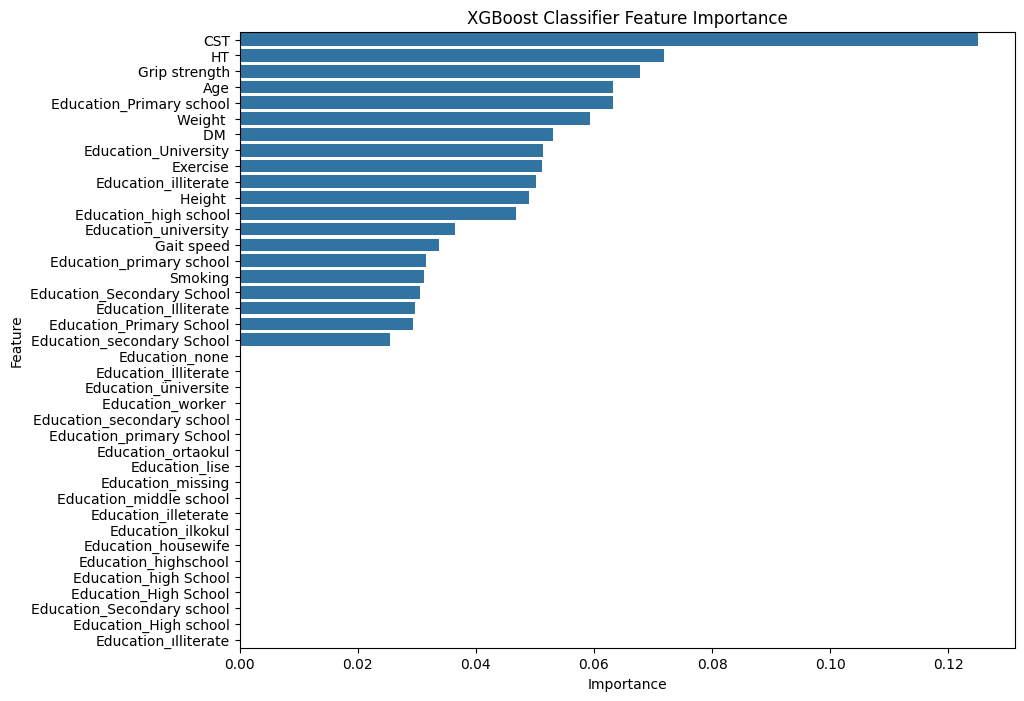

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df3)
plt.title('XGBoost Classifier Feature Importance')
plt.show()

In [ ]:
print("Model 1 results:")
print(f'Accuracy: {accuracy1}')
print(f'Precision: {precision1}')
print(f'Recall: {recall1}')
print(f'F1 Score: {f1_1}')

Model 1 results:
Accuracy: 0.8159509202453987
Precision: 0.45454545454545453
Recall: 0.1724137931034483
F1 Score: 0.25000000000000006


In [ ]:
print("Model 2 results:")
print(f'Accuracy: {accuracy2}')
print(f'Precision: {precision2}')
print(f'Recall: {recall2}')
print(f'F1 Score: {f1_2}')

Model 2 results:
Accuracy: 0.8558282208588958
Precision: 0.6774193548387096
Recall: 0.3620689655172414
F1 Score: 0.47191011235955055


In [ ]:
print(f"Model 3 results:")
print(f'Accuracy: {accuracy3}')
print(f'Precision: {precision3}')
print(f'Recall: {recall3}')
print(f'F1 Score: {f1_3}')

Model 3 results:
Accuracy: 0.8588957055214724
Precision: 0.65
Recall: 0.4482758620689655
F1 Score: 0.5306122448979592
